In [119]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [124]:
#задание функции и вычисление формулы Ньютона-Лейбница
def f(x):
    return np.exp(-x)

a, b = 0, 20

F = lambda a, b: -np.exp(-b) + np.exp(-a)

In [125]:
#метод срединных прямоугольников с фиксированной сеткой
def crect(f, a, b, npts):
    h = (b - a) / npts
    summ = 0
    for j in range(npts):
        x = a + h*(j + 0.5)
        summ += f(x)
    return summ * h

In [139]:
#значение интеграла и время выполнения
for n in (10, 100, 1000, 10000):
    print("%5.5g : %g" % (n, crect(f, a, b, n)))
    %timeit crect(f, a, b, n)
    print('=================')

   10 : 0.850918
21 µs ± 933 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
  100 : 0.998335
208 µs ± 17.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
 1000 : 0.999983
1.99 ms ± 177 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10000 : 1
19.8 ms ± 877 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
def make_rect(a, b, f):
    """Make a rectangle for the interval [a, b]"""
    rect = (a, b-a)
    xm = a + rect[1] / 2.
    return (-f(xm) * rect[1], rect)

In [113]:
def get_max_elem(lst, key=None):
    """Find and remove the maximum element from the list.
    
    Find the max element (according to the parameter `key`, which is a callable),
    remove it from the list, and return both the element and the rest.
    """
    #Pop and return the smallest item from the heap, maintaining the heap invariant. 
    #If the heap is empty, IndexError is raised.
    # Раз производится сравнение отрицательных чисел, 
    #   то минимальный элемент соответствует прямоугольнику с наибольшей площадью.
    elem = heapq.heappop(lst)
    
    return elem, lst

def adapt_rect_list(f, a, b, npts):
    """Integrate f(x) from a to b using npts steps of the adaptive algorithm.
    """
    lst = []

    # start from a single rectangle
    item = make_rect(a, b, f)
    lst.append(item)
    
    # loop
    for _ in range(npts):
        # get the largest one
        rect, lst = get_max_elem(lst, lambda x: x[0])
        w, (start, width) = rect
                
        # and split it into two halves
        c = start + width / 2.
        
        rect1 = make_rect(start, c, f)
        rect2 = make_rect(c, start + width, f)
        
        #добавление новых прямоугольников в list с сортировкой
        heapq.heappush(lst, rect1)
        heapq.heappush(lst, rect2)
        
    # collect the answer
    return -sum(w for w, r in lst), lst

In [128]:
# A rectangle is (start, width)
# A list element is (-weight, (start, width))

def get_max_elem_1(lst, key=None):
    """Find and remove the maximum element from the list.
    
    Find the max element (according to the parameter `key`, which is a callable),
    remove it from the list, and return both the element and the rest.
    """
    if key is None:
        # use the identity function
        key = lambda x: x
    
    # find the max element
    elem = max(lst, key=key)
    
    # find its position in the list
    idx = lst.index(elem)
    
    return elem, lst[:idx] + lst[idx+1:]

    
def adapt_rect_list_1(f, a, b, npts):
    """Integrate f(x) from a to b using npts steps of the adaptive algorithm.
    """
    lst = []

    # start from a single rectangle
    item = make_rect(a, b, f)
    lst.append(item)
    
    # loop
    for _ in range(npts):
        # get the largest one
        rect, lst = get_max_elem_1(lst, lambda x: -x[0])
        w, (start, width) = rect
                
        # and split it into two halves
        c = start + width / 2.
        
        rect1 = make_rect(start, c, f)
        rect2 = make_rect(c, start + width, f)
        
        lst.append(rect1)
        lst.append(rect2)
        
    # collect the answer
    return -sum(w for w, r in lst), lst

In [140]:
#вывод результатов разных подходов расчета по адаптивной сетке
for n in (5, 25, 125, 250, 500, 1000, 5000, 10000):
    res, lst = adapt_rect_list(f, a, b, n)
    print ('adapt_heapq: n, res = ', n, res)
    res, lst = adapt_rect_list_1(f, a, b, n)
    print ('adapt_class: n, res = ', n, res)
    print('=================')

adapt_heapq: n, res =  5 0.955269838834778
adapt_class: n, res =  5 0.9552698388347781
adapt_heapq: n, res =  25 0.978671896242808
adapt_class: n, res =  25 0.9786718962428081
adapt_heapq: n, res =  125 0.9956502001607697
adapt_class: n, res =  125 0.9956502001607699
adapt_heapq: n, res =  250 0.9959491604791236
adapt_class: n, res =  250 0.9959491604791242
adapt_heapq: n, res =  500 0.9960027891786782
adapt_class: n, res =  500 0.9960027891786778
adapt_heapq: n, res =  1000 0.9997391610745805
adapt_class: n, res =  1000 0.9997391610745809
adapt_heapq: n, res =  5000 0.9999405212446223
adapt_class: n, res =  5000 0.999940521244624
adapt_heapq: n, res =  10000 0.9999470177107865
adapt_class: n, res =  10000 0.9999470177107864


In [141]:
#время выполнения программ
%timeit adapt_rect_list(f, a, b, npts=1000)
%timeit adapt_rect_list_1(f, a, b, npts=1000)

4.68 ms ± 125 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
84 ms ± 2.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


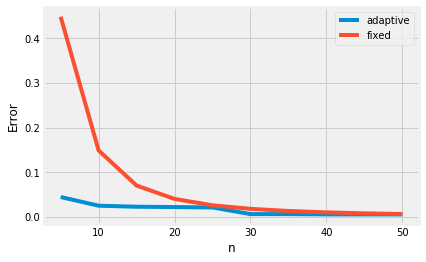

In [142]:
#графическое отображение скорости сходимости
res1 = []
res2 = []
a, b = 0, 20
npts = []
for n in range(5,55,5):
    npts.append(n)
    res1.append(abs(adapt_rect_list(f, a, b, n)[0]-F(a,b)))
    res2.append(abs(crect(f,a,b,n)-F(a,b)))

plt.figure()
plt.plot(npts,res1,label = 'adaptive')
plt.plot(npts,res2,label = 'fixed')
plt.ylabel('Error')
plt.xlabel('n')
plt.legend()
plt.plot()
plt.show()